In [1]:
import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('6_lakh(head).csv')
X= dataset.iloc[:,0:6]
y= dataset.iloc[:,6]

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X=np.array(X.head(5000))
y=np.array(y.head(5000))
#X=np.array()
#y=np.array()
X = sc.fit_transform(X)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,stratify=y)

In [5]:
class KNN():
    def __init__(self):

        self.X_train = []
        self.y_train = []

    def euclidian(self,x1,x2):

        difference =  np.subtract(x1,x2)
        square_difference = np.power(difference,2)
        sum_square_difference = np.sum(square_difference)

        return sum_square_difference**(0.5)

    def fit(self,X,y):

        self.X_train = X
        self.y_train = y

    def predict(self,X_test,k=9):

        y_pred = []

        for i in range(X_test.shape[0]):
            distances = []
            for j in range(self.X_train.shape[0]):
                distances.append(self.euclidian(X_train[j],X_test[i]))

            indeces = np.argsort(np.array(distances))
            sol = 0
            threshold=0.5
            for K in range(k):

                sol += self.y_train[indeces[K]]
            if((sol/k)>=0.5):
                y_pred.append(1)
            else:
                y_pred.append(0)
           # y_pred.append(sol/k)
        return y_pred

In [20]:
cores = [i+1 for i in range(8)]
times = []

In [7]:
model = KNN()
model.fit(X_train,y_train.reshape(y_train.shape[0],))
def main(threads):
    with multiprocessing.Pool(processes=threads) as pool:
        start = time.time()
        y_pred=pool.map(model.predict,X_test) 
        end = time.time()
    return end - start

In [8]:
if __name__=="__main__":
    time_taken = main(1)
    times.append(time_taken)
    print(time_taken)

338.2477676868439


In [9]:
if __name__=="__main__":
    time_taken = main(2)
    times.append(time_taken)
    print(time_taken)

178.81885433197021


In [10]:
if __name__=="__main__":
    time_taken = main(3)
    times.append(time_taken)
    print(time_taken)

119.98989653587341


In [11]:
if __name__=="__main__":
    time_taken = main(4)
    times.append(time_taken)
    print(time_taken)

117.525550365448


In [12]:
if __name__=="__main__":
    time_taken = main(5)
    times.append(time_taken)
    print(time_taken)

108.45948076248169


In [13]:
if __name__=="__main__":
    time_taken = main(6)
    times.append(time_taken)
    print(time_taken)

104.42949509620667


In [14]:
if __name__=="__main__":
    time_taken = main(7)
    times.append(time_taken)
    print(time_taken)

100.97717952728271


In [15]:
if __name__=="__main__":
    time_taken = main(8)
    times.append(time_taken)
    print(time_taken)

100.65329003334045


In [16]:
times

[338.2477676868439,
 178.81885433197021,
 119.98989653587341,
 117.525550365448,
 108.45948076248169,
 104.42949509620667,
 100.97717952728271,
 100.65329003334045]

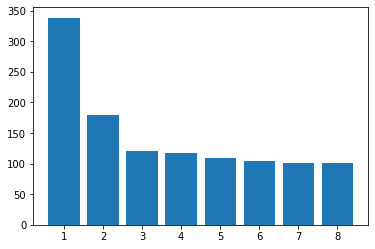

In [22]:
plt.bar(cores, times)
plt.show()